In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data',header = None)

In [3]:
test_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test',skiprows =1 ,header=None)

In [4]:
col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num',
                'marital_status', 'occupation','relationship', 'race', 'sex', 'capital_gain',
                'capital_loss', 'hours_per_week', 'native_country', 'wage_class']

In [5]:
train_set.columns = col_labels
test_set.columns = col_labels

In [6]:
train_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [7]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  wage_class      32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [8]:
train_set.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
wage_class        0
dtype: int64

<AxesSubplot:>

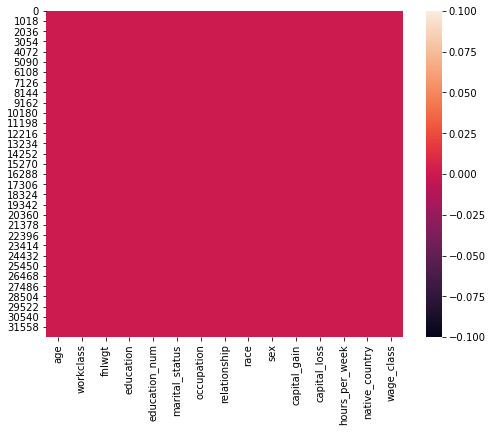

In [9]:
plt.figure(figsize=(8,6))
sns.heatmap(train_set.isnull())

<AxesSubplot:>

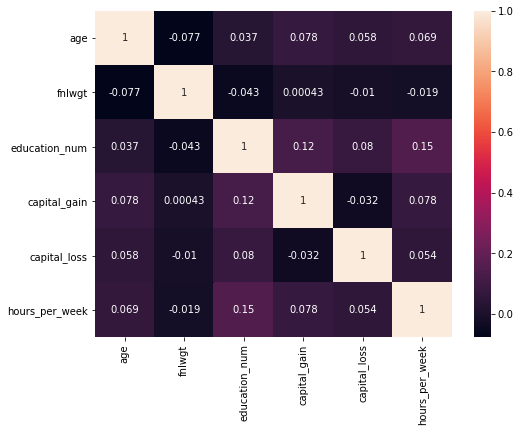

In [10]:
plt.figure(figsize=(8,6))
sns.heatmap(train_set.corr(),annot=True)

In [11]:
train_set.shape

(32561, 15)

In [12]:
test_set.shape

(16281, 15)

In [13]:
test_set.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
wage_class        0
dtype: int64

In [14]:
data = pd.concat([train_set,test_set])

In [15]:
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
wage_class        0
dtype: int64

In [16]:
unique_values = [data[feature].unique() for feature in data if data[feature].dtype == 'object']

In [17]:
for value in unique_values:
    print(value)

[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']
[' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']
[' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']
[' Male' ' Female']
[' United-States' ' Cuba' ' Jamaica' ' India' ' ?' ' Mexico' ' South'
 ' Puerto-Rico' ' Honduras' ' England' ' Canada' ' Germany' 

In [18]:
data = data.replace(' ?', np.nan)

In [19]:
data.isnull().sum()

age                  0
workclass         2799
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     857
wage_class           0
dtype: int64

__Feature Engineering__

### Work class

In [20]:
data['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', nan, ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [21]:
data['workclass'].value_counts()

 Private             33906
 Self-emp-not-inc     3862
 Local-gov            3136
 State-gov            1981
 Self-emp-inc         1695
 Federal-gov          1432
 Without-pay            21
 Never-worked           10
Name: workclass, dtype: int64

In [22]:
data.replace(' Without-pay', ' Never-worked',inplace=True)

In [23]:
data['workclass'].value_counts()

 Private             33906
 Self-emp-not-inc     3862
 Local-gov            3136
 State-gov            1981
 Self-emp-inc         1695
 Federal-gov          1432
 Never-worked           31
Name: workclass, dtype: int64

In [24]:
data['workclass'].isnull().sum()
data['workclass'].fillna(0,inplace=True)

In [25]:
data['workclass'].isnull().sum()

0

In [26]:
data['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', 0, ' Self-emp-inc', ' Never-worked'], dtype=object)

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, ' State-gov'),
  Text(1, 0, ' Self-emp-not-inc'),
  Text(2, 0, ' Private'),
  Text(3, 0, ' Federal-gov'),
  Text(4, 0, ' Local-gov'),
  Text(5, 0, '0'),
  Text(6, 0, ' Self-emp-inc'),
  Text(7, 0, ' Never-worked')])

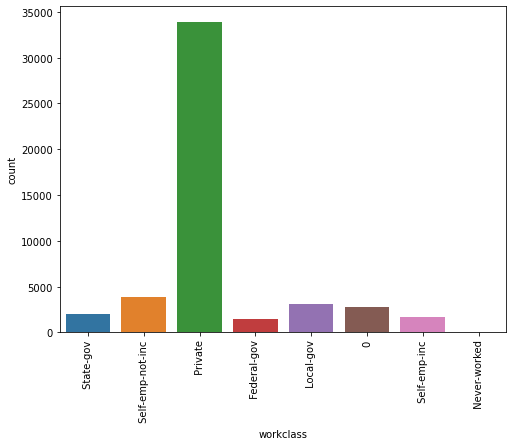

In [27]:
plt.figure(figsize=(8,6))
sns.countplot(x= data['workclass'])
plt.xticks(rotation = 90)

### Wage class

In [28]:
data['wage_class'].unique()

array([' <=50K', ' >50K', ' <=50K.', ' >50K.'], dtype=object)

In [29]:
data.replace({' <=50K':0, ' >50K':1, ' <=50K.':0, ' >50K.':1},inplace=True)

<AxesSubplot:xlabel='wage_class', ylabel='count'>

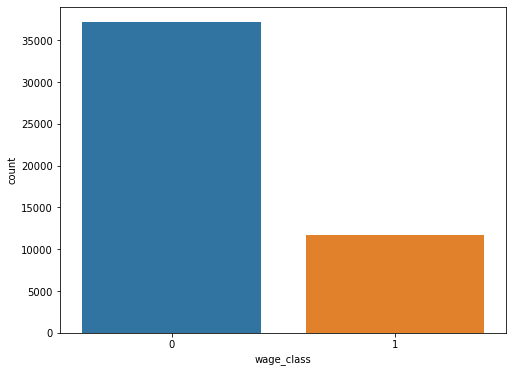

In [30]:
plt.figure(figsize=(8,6))
sns.countplot(x= data['wage_class'])

### Fnlwgt

In [31]:
data['fnlwgt'].values

array([ 77516,  83311, 215646, ..., 374983,  83891, 182148], dtype=int64)

In [32]:
data['fnlwgt'].describe()

count    4.884200e+04
mean     1.896641e+05
std      1.056040e+05
min      1.228500e+04
25%      1.175505e+05
50%      1.781445e+05
75%      2.376420e+05
max      1.490400e+06
Name: fnlwgt, dtype: float64

In [33]:
data['fnlwgt'] = data['fnlwgt'].apply(lambda x: np.log1p(x))

In [34]:
data['fnlwgt'].values

array([11.25825255, 11.33034788, 12.28139809, ..., 12.83463864,
       11.33728554, 12.11258031])

### Education

In [35]:
data['education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, ' Bachelors'),
  Text(1, 0, ' HS-grad'),
  Text(2, 0, ' 11th'),
  Text(3, 0, ' Masters'),
  Text(4, 0, ' 9th'),
  Text(5, 0, ' Some-college'),
  Text(6, 0, ' Assoc-acdm'),
  Text(7, 0, ' Assoc-voc'),
  Text(8, 0, ' 7th-8th'),
  Text(9, 0, ' Doctorate'),
  Text(10, 0, ' Prof-school'),
  Text(11, 0, ' 5th-6th'),
  Text(12, 0, ' 10th'),
  Text(13, 0, ' 1st-4th'),
  Text(14, 0, ' Preschool'),
  Text(15, 0, ' 12th')])

<Figure size 576x432 with 0 Axes>

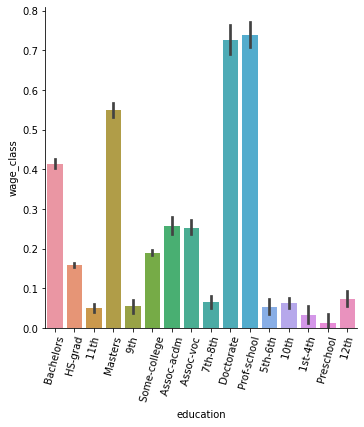

In [36]:
plt.figure(figsize=(8,6))
sns.catplot(x='education',y='wage_class',data=data,kind='bar')
plt.xticks(rotation=75)

In [37]:
def func_primary(x):
    if x in [' 1st-4th', ' 5th-6th', ' 7th-8th', ' 9th', ' 10th', ' 11th', ' 12th']:
        return 'Primary Edu.'
    else:
        return x

In [38]:
data['education'] = data['education'].apply(func_primary)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, ' Bachelors'),
  Text(1, 0, ' HS-grad'),
  Text(2, 0, 'Primary Edu.'),
  Text(3, 0, ' Masters'),
  Text(4, 0, ' Some-college'),
  Text(5, 0, ' Assoc-acdm'),
  Text(6, 0, ' Assoc-voc'),
  Text(7, 0, ' Doctorate'),
  Text(8, 0, ' Prof-school'),
  Text(9, 0, ' Preschool')])

<Figure size 576x432 with 0 Axes>

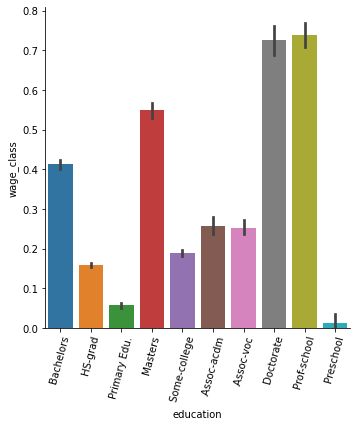

In [39]:
plt.figure(figsize=(8,6))
sns.catplot(x='education',y='wage_class',data=data,kind='bar')
plt.xticks(rotation=75)

### Marital Status

In [40]:
data['marital_status'].unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

In [41]:
data['marital_status'].value_counts()

 Married-civ-spouse       22379
 Never-married            16117
 Divorced                  6633
 Separated                 1530
 Widowed                   1518
 Married-spouse-absent      628
 Married-AF-spouse           37
Name: marital_status, dtype: int64

In [42]:
data['marital_status'].replace(' Married-civ-spouse', ' Married-AF-spouse',inplace=True)

In [43]:
data['marital_status'].value_counts()

 Married-AF-spouse        22416
 Never-married            16117
 Divorced                  6633
 Separated                 1530
 Widowed                   1518
 Married-spouse-absent      628
Name: marital_status, dtype: int64

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, ' Never-married'),
  Text(1, 0, ' Married-AF-spouse'),
  Text(2, 0, ' Divorced'),
  Text(3, 0, ' Married-spouse-absent'),
  Text(4, 0, ' Separated'),
  Text(5, 0, ' Widowed')])

<Figure size 576x432 with 0 Axes>

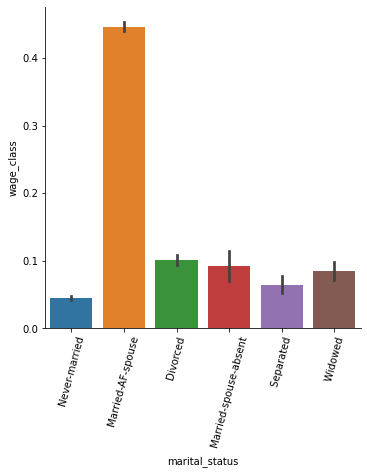

In [44]:
plt.figure(figsize=(8,6))
sns.catplot(x='marital_status',y='wage_class',data=data,kind='bar')
plt.xticks(rotation=75)

### Occupation

In [45]:
data['occupation'].unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', nan, ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [46]:
data['occupation'].value_counts()

 Prof-specialty       6172
 Craft-repair         6112
 Exec-managerial      6086
 Adm-clerical         5611
 Sales                5504
 Other-service        4923
 Machine-op-inspct    3022
 Transport-moving     2355
 Handlers-cleaners    2072
 Farming-fishing      1490
 Tech-support         1446
 Protective-serv       983
 Priv-house-serv       242
 Armed-Forces           15
Name: occupation, dtype: int64

In [47]:
data['occupation'].isnull().sum()

2809

In [48]:
data['occupation'].fillna(0,inplace=True)

In [49]:
data['occupation'].isnull().sum()

0

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, ' Adm-clerical'),
  Text(1, 0, ' Exec-managerial'),
  Text(2, 0, ' Handlers-cleaners'),
  Text(3, 0, ' Prof-specialty'),
  Text(4, 0, ' Other-service'),
  Text(5, 0, ' Sales'),
  Text(6, 0, ' Craft-repair'),
  Text(7, 0, ' Transport-moving'),
  Text(8, 0, ' Farming-fishing'),
  Text(9, 0, ' Machine-op-inspct'),
  Text(10, 0, ' Tech-support'),
  Text(11, 0, '0'),
  Text(12, 0, ' Protective-serv'),
  Text(13, 0, ' Armed-Forces'),
  Text(14, 0, ' Priv-house-serv')])

<Figure size 576x432 with 0 Axes>

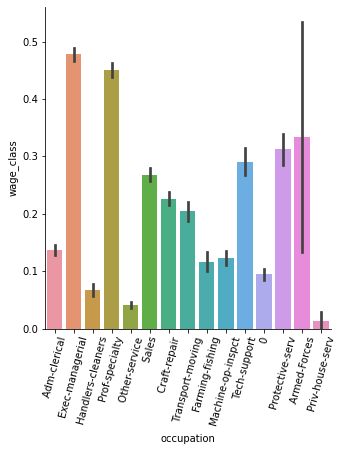

In [50]:
plt.figure(figsize=(8,6))
sns.catplot(x='occupation',y='wage_class',data=data,kind='bar')
plt.xticks(rotation=75)

In [51]:
data['occupation'].replace(' Armed-Forces', 0, inplace=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, ' Adm-clerical'),
  Text(1, 0, ' Exec-managerial'),
  Text(2, 0, ' Handlers-cleaners'),
  Text(3, 0, ' Prof-specialty'),
  Text(4, 0, ' Other-service'),
  Text(5, 0, ' Sales'),
  Text(6, 0, ' Craft-repair'),
  Text(7, 0, ' Transport-moving'),
  Text(8, 0, ' Farming-fishing'),
  Text(9, 0, ' Machine-op-inspct'),
  Text(10, 0, ' Tech-support'),
  Text(11, 0, '0'),
  Text(12, 0, ' Protective-serv'),
  Text(13, 0, ' Priv-house-serv')])

<Figure size 576x432 with 0 Axes>

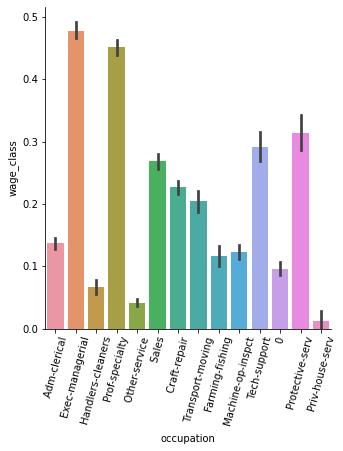

In [52]:
plt.figure(figsize=(8,6))
sns.catplot(x='occupation',y='wage_class',data=data,kind='bar')
plt.xticks(rotation=75)

### Relationship

In [53]:
data['relationship'].unique()

array([' Not-in-family', ' Husband', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

In [54]:
data['relationship'].value_counts()

 Husband           19716
 Not-in-family     12583
 Own-child          7581
 Unmarried          5125
 Wife               2331
 Other-relative     1506
Name: relationship, dtype: int64

### Race

In [55]:
data['race'].unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

In [56]:
data['race'].value_counts()

 White                 41762
 Black                  4685
 Asian-Pac-Islander     1519
 Amer-Indian-Eskimo      470
 Other                   406
Name: race, dtype: int64

### Sex

In [57]:
data['sex'].unique()

array([' Male', ' Female'], dtype=object)

In [58]:
data['sex'].value_counts()

 Male      32650
 Female    16192
Name: sex, dtype: int64

### Country

In [59]:
data['native_country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', nan, ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [60]:
def native_country(country):
    if country in [' United-States', ' Canada']:
        return "North_America"
    elif country in [' Puerto-Rico',' El-Salvador',' Cuba',' Jamaica',' Dominican-Republic',
                     ' Guatemala',' Haiti',' Nicaragua',' Trinadad&Tobago',' Honduras']:
        return "Central_America"
    elif country in [' Mexico',' Columbia',' Vietnam',' Peru',' Ecuador',' South',
                     ' Outlying-US(Guam-USVI-etc)']:
        return "South_America"
    elif country in [' Germany',' England',' Italy',' Poland',' Portugal',' Greece',
                     ' Yugoslavia',' France',' Ireland',' Scotland',' Hungary',
                     ' Holand-Netherlands']:
        return "Europe"
    elif country in [' India',' Iran',' China',' Japan',' Thailand',' Hong',' Cambodia',
                     ' Laos',' Philippines',' Taiwan']:
        return "Asia"
    else:
        return country

In [61]:
data['native_country'] = data['native_country'].apply(native_country)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'North_America'),
  Text(1, 0, 'Central_America'),
  Text(2, 0, 'Asia'),
  Text(3, 0, 'South_America'),
  Text(4, 0, 'Europe')])

<Figure size 576x432 with 0 Axes>

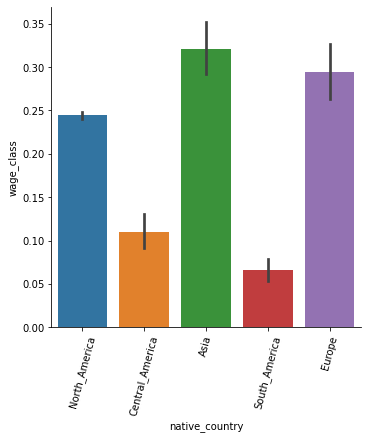

In [62]:
plt.figure(figsize=(8,6))
sns.catplot(x='native_country',y='wage_class',data=data,kind='bar')
plt.xticks(rotation=75)

__Train and Test data__

In [63]:
X = data.iloc[:,:-1]

In [64]:
X.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,39,State-gov,11.258253,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,North_America
1,50,Self-emp-not-inc,11.330348,Bachelors,13,Married-AF-spouse,Exec-managerial,Husband,White,Male,0,0,13,North_America
2,38,Private,12.281398,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,North_America
3,53,Private,12.366157,Primary Edu.,7,Married-AF-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,North_America
4,28,Private,12.732013,Bachelors,13,Married-AF-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Central_America


In [65]:
y = data.iloc[:,-1]

In [66]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: wage_class, dtype: int64

In [67]:
X = pd.get_dummies(X)

In [68]:
X.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass_0,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male,native_country_Asia,native_country_Central_America,native_country_Europe,native_country_North_America,native_country_South_America
0,39,11.258253,13,2174,0,40,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
1,50,11.330348,13,0,0,13,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
2,38,12.281398,9,0,0,40,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
3,53,12.366157,7,0,0,40,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
4,28,12.732013,13,0,0,40,0,0,0,0,...,1,0,0,1,0,0,1,0,0,0


In [69]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled_data = scaler.fit_transform(X)

In [70]:
X_scaled_data

array([[ 0.02599598, -1.14884831,  1.136512  , ..., -0.12739324,
         0.33119839, -0.16866385],
       [ 0.82830842, -1.03455833,  1.136512  , ..., -0.12739324,
         0.33119839, -0.16866385],
       [-0.04694151,  0.47310536, -0.41933527, ..., -0.12739324,
         0.33119839, -0.16866385],
       ...,
       [-0.04694151,  1.35013653,  1.136512  , ..., -0.12739324,
         0.33119839, -0.16866385],
       [ 0.39068346, -1.02356032,  1.136512  , ..., -0.12739324,
         0.33119839, -0.16866385],
       [-0.26575399,  0.20548497,  1.136512  , ..., -0.12739324,
         0.33119839, -0.16866385]])

In [71]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled_data, y, test_size=0.33, random_state=100)

In [72]:
print("Train:",X_train.shape)
print("Test:",X_test.shape)

Train: (32724, 62)
Test: (16118, 62)


__Training Model__

In [73]:
from xgboost import XGBClassifier
classifier = XGBClassifier()

In [74]:
classifier.fit(X_train, y_train)

C:\Users\prati\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:57:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [75]:
y_predict = classifier.predict(X_test)

In [76]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [77]:
print('Accuracy Score: {}\n'.format(accuracy_score(y_test, y_predict)))
print('Confusion Matrix:\n {}\n'.format(confusion_matrix(y_test, y_predict)))
print('Classification Report: {}'.format(classification_report(y_test,y_predict)))

Accuracy Score: 0.8740538528353393

Confusion Matrix:
 [[11518   712]
 [ 1318  2570]]

Classification Report:               precision    recall  f1-score   support

           0       0.90      0.94      0.92     12230
           1       0.78      0.66      0.72      3888

    accuracy                           0.87     16118
   macro avg       0.84      0.80      0.82     16118
weighted avg       0.87      0.87      0.87     16118



__Hyperparameter Tuning__

In [82]:
params = {'max_depth':[3, 5, 7], 'min_child_weight': [1], 'eta':[.3, .1, .05, .005],
          'subsample': [i/10 for i in range(7,9)],
          'colsample_bytree': [i/10 for i in range(7,9)], 'n_estimators':[10, 50, 100, 200],
          'learning_rate':[0.01, 0.001]}

In [83]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(classifier, params, scoring = 'accuracy', cv = 5, n_jobs=-1, verbose=3)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 384 candidates, totalling 1920 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   16.9s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  8.8min
[Parallel(n_jobs=-1)]: Done 504 tasks      | elapsed: 16.7min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed: 27.2min
[Parallel(n_jobs=-1)]: Done 1144 tasks      | elapsed: 40.7min
[Parallel(n_jobs=-1)]: Done 1560 tasks      | elapsed: 57.7min
[Parallel(n_jobs=-1)]: Done 1920 out of 1920 | elapsed: 71.6min finished
C:\Users\prati\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label

[16:17:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0, gpu_id=-1,
                                     importance_type='gain',
                                     interaction_constraints='',
                                     learning_rate=0.300000012,
                                     max_delta_step=0, max_depth=6,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                                     n_estimators=100, n_jobs=4,
                                     num_parallel...=0,
                                     reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, subsample=1,
                                     tree_method='exact', validate_parameters=1,
                           

In [84]:
grid_search.best_params_

{'colsample_bytree': 0.7,
 'eta': 0.3,
 'learning_rate': 0.01,
 'max_depth': 7,
 'min_child_weight': 1,
 'n_estimators': 200,
 'subsample': 0.8}

In [85]:
classifier_hyper = XGBClassifier(colsample_bytree= 0.7, eta= 0.3,
                                 learning_rate= 0.01, max_depth=7,
                                    min_child_weight=1, n_estimators= 200,
                                     subsample= 0.8)

In [86]:
classifier_hyper.fit(X_train, y_train)

C:\Users\prati\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:21:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, eta=0.3, gamma=0,
              gpu_id=-1, importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.8,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [87]:
y_predict_hyper = classifier_hyper.predict(X_test)

In [88]:
print('Accuracy Score: {}\n'.format(accuracy_score(y_test, y_predict_hyper)))
print('Confusion Matrix:\n {}\n'.format(confusion_matrix(y_test, y_predict_hyper)))
print('Classification Report: {}'.format(classification_report(y_test,y_predict_hyper)))

Accuracy Score: 0.8639409355999503

Confusion Matrix:
 [[11652   578]
 [ 1615  2273]]

Classification Report:               precision    recall  f1-score   support

           0       0.88      0.95      0.91     12230
           1       0.80      0.58      0.67      3888

    accuracy                           0.86     16118
   macro avg       0.84      0.77      0.79     16118
weighted avg       0.86      0.86      0.86     16118

